# Image stitching
Implement image stitching to create panoramic
images.

Use Python, parallelize the
process (feature detection/matching and following
homography estimation, warping and blending)

#First we make the needed imports for an optimal performance of the script
CV2, glob, matplot and numpy are some of the required libraries

In [11]:
import cv2
import glob
import matplotlib.pyplot as plt
import math
import os
from google.colab import drive
import numpy as np



In [12]:
#Read Images
drive.mount('/content/drive')

images_folder_path = '/content/drive/My Drive/Colab_Notebooks/images_for_stiching_2'

imagefiles = os.listdir(images_folder_path)
imagefiles.sort()


images = []

"""
Load and process images from a folder.

Args:
    imagefiles: List of image filenames.
    images_folder_path: Path to the folder containing images.

Returns:
    A list of images loaded and converted to RGB format.
"""

for filename in imagefiles:
    # Construct full file path
    full_file_path = os.path.join(images_folder_path, filename)

    # Read image (add error checking)
    img = cv2.imread(full_file_path)
    if img is not None:
        # Convert to RGB if image loaded successfully
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        images.append(img)
    else:
        print(f"Error loading image: {full_file_path}")

# Get the number of images
num_images = len(images)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


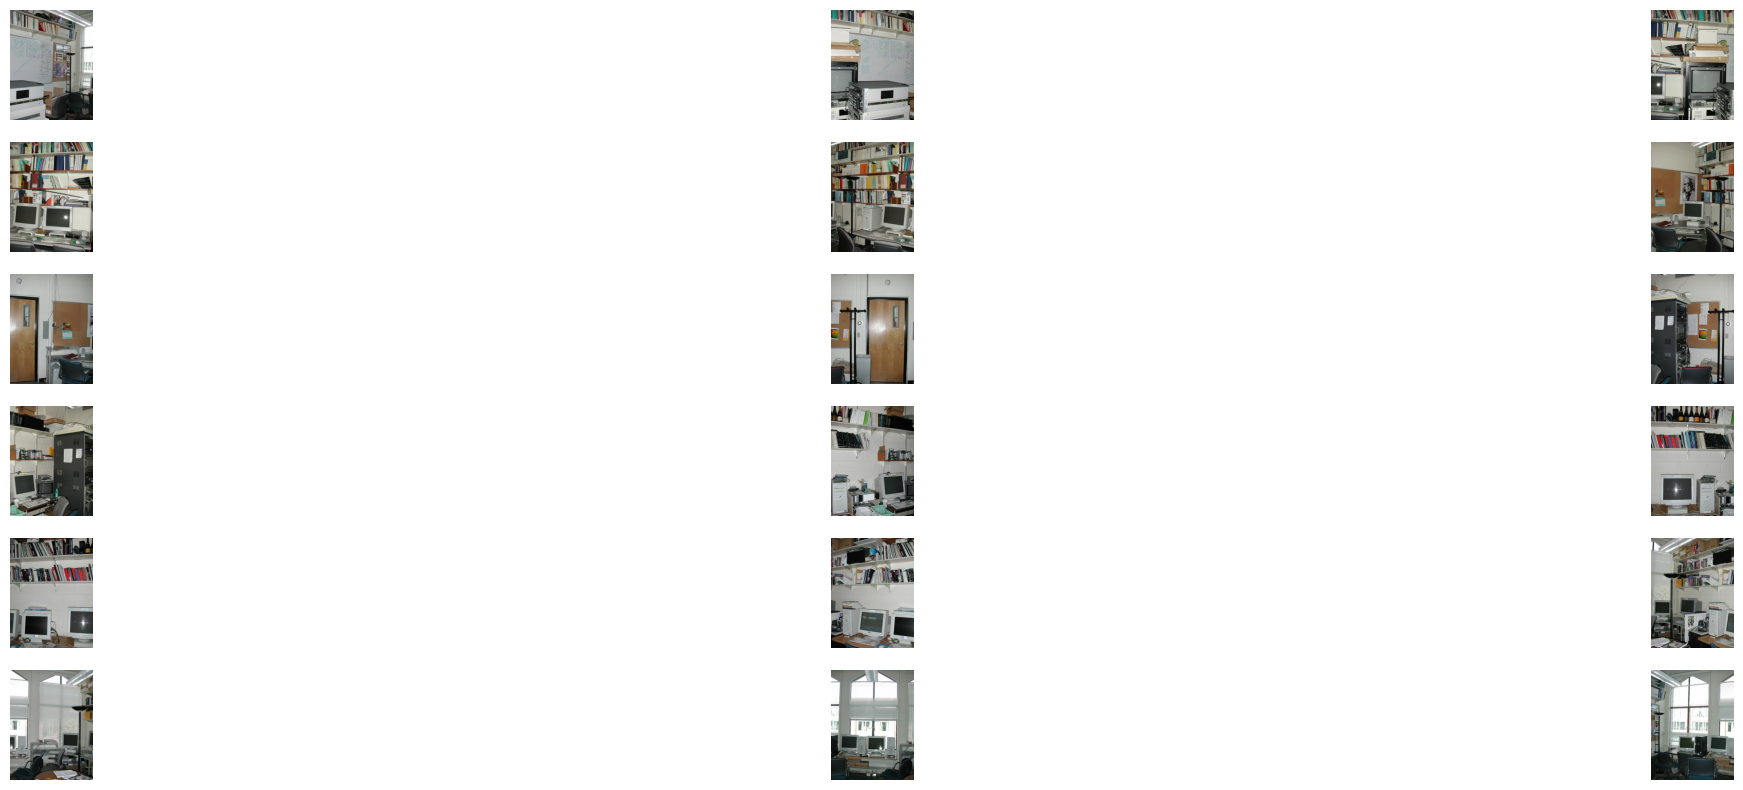

In [13]:
"""
Display multiple images in a grid layout.

Args:
    num_images: Total number of images to display.
    num_rows: Number of rows in the grid.
    num_cols: Number of columns in the grid.
    images: List of images to be displayed.

Returns:
    Displays images using Matplotlib without axis labels.
"""
plt.figure(figsize=[30, 10])
num_cols = 3
num_rows = math.ceil(num_images/num_cols)
for i in range(0, num_images):
  plt.subplot(num_rows, num_cols, i+1)
  plt.axis('off')
  plt.imshow(images[i])


In [14]:
"""
Create a Stitcher instance for panoramic image stitching.

Args:
    None (Uses OpenCV's built-in Stitcher class).

Returns:
    A Stitcher object used for automatic image stitching.
"""
sticher = cv2.Stitcher_create()


"""
Resize images while maintaining aspect ratio.

Args:
    images: List of images to be resized.
    max_dimension: Maximum allowed dimension for width or height.

Returns:
    A list of resized images where the larger dimension is scaled to max_dimension.
"""

max_dimension = 500  # Reduced from 1000 to 500 for faster processing and potentially better feature matching
resized_images = []
for img in images:
    height, width = img.shape[:2]
    if max(height, width) > max_dimension:
        scale_factor = max_dimension / max(height, width)
        resized_img = cv2.resize(img, None, fx=scale_factor, fy=scale_factor)
        resized_images.append(resized_img)
    else:
        resized_images.append(img)



status, result = sticher.stitch(resized_images)


"""
Display and save the stitched panoramic image.

Args:
    status: Status of the stitching process (0 indicates success).
    result: The final stitched image.

Returns:
    Displays the stitched image using Matplotlib.
    Saves the image to Google Drive if stitching is successful.
"""

if status == 0:
  plt.figure(figsize=[30, 10])
  plt.imshow(result)

  # Save to Google Drive
  drive.mount('/content/drive') # Make sure Drive is mounted
  save_path = '/content/drive/My Drive/Colab_Notebooks/generations/panoramic.jpg'
  cv2.imwrite(save_path, cv2.cvtColor(result, cv2.COLOR_RGB2BGR))
  print(f"Stitched image saved to: {save_path}")

else:
  print("Stiching failed")

Stiching failed


This part does not work at all, we need to work in its implementation


In [15]:
"""
Remove black borders from the right side of a colored image.

Args:
    image_path (str): Path to the input image.
    output_path (str): Path to save the cropped image.
    part_width (int, optional): Width of the sections to analyze for black pixels. Defaults to 5.

Returns:
    Saves the cropped colored image without black borders to the specified output path.
"""

def remove_black_borders(image_path, output_path, part_width=5):
    # Load the image in color
    img = cv2.imread(image_path)
    if img is None:
        print("Image not found.")
        return

    # Convert image to grayscale for border detection
    gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    h, w = gray_img.shape
    print(f"Image dimensions: Height={h}, Width={w}")

    # Initialize the right boundary
    right = w
    print(f"Initial right boundary: {right}")

    # Iterate over the right side of the image in chunks
    while right > 200:
        # Extract a vertical strip (part) from the right edge
        part = gray_img[:, right - part_width:right]

        # Condition to check if the majority of pixels in the part are black
        if np.sum(part < 50) > (h * part_width) - (h * part_width) / 2:
            # If most pixels are black, update the right boundary to crop more
            right -= part_width
        else:
            # Stop when a non-black section is found
            break

    # Ensure the cropped area is valid
    if right > 0:
        cropped_img = img[:, :right]  # Crop the image up to the detected right boundary
        cv2.imwrite(output_path, cropped_img)
        print(f"Cropped image saved to {output_path}")
    else:
        # If no black borders were detected, save the original image
        cv2.imwrite(output_path, img)
        print(f"Original image saved to {output_path}")




image_path = '/content/drive/My Drive/Colab_Notebooks/generations/panoramic.jpg'
output_path = '/content/drive/My Drive/Colab_Notebooks/generations/croppedpanoramic.jpg'
remove_black_borders(image_path, output_path)

Image dimensions: Height=521, Width=2328
Initial right boundary: 2328
Cropped image saved to /content/drive/My Drive/Colab_Notebooks/generations/croppedpanoramic.jpg
